# Evaluate YOLO v3 on Inferentia
## Note: this tutorial runs on tensorflow-neuron 1.x only

## Introduction
This tutorial walks through compiling and evaluating YOLO v3 model on Inferentia using the AWS Neuron SDK.


In this tutorial we provide two main sections:

1. Download Dataset and Generate Pretrained SavedModel

2. Compile the YOLO v3 model.

3. Deploy the same compiled model.

Before running the following verify this Jupyter notebook is running “conda_aws_neuron_tensorflow_p36” kernel. You can select the Kernel from the “Kernel -> Change Kernel” option on the top of this Jupyter notebook page.

Instructions of how to setup Neuron Tensorflow environment and run the tutorial as a Jupyter notebook are available in the Tutorial main page [Tensorflow-YOLO_v3 Tutorial](https://awsdocs-neuron.readthedocs-hosted.com/en/latest/neuron-guide/neuron-frameworks/tensorflow-neuron/tutorials/yolo_v3_demo/yolo_v3_demo.html)

## Prerequisites


This demo requires the following pip packages:

`pillow matplotlib pycocotools`


In [1]:

import sys
!{sys.executable} -m pip install pillow matplotlib pycocotools==2.0.2 --force --extra-index-url=https://pip.repos.neuron.amazonaws.com
    

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 3.0 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 110.2 MB/s eta 0:00:01
     |████████████████████████████████| 816 kB 110.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 112.3 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 128.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 98.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 132.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 114.2 MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=274260 sha256=bfd92cb6616d54561e4b92c968eddb71b5759a56cae2be43e05024c093b4fb77
  Stored in directory: /tmp/pip-ephem-wheel-cache-a44sw1mu/wheels/d8/c2/ba/8f5306f921c2e79ad7b09effdfed6bd966cfcf8c6fe55422d6
Successfully built p

## Part 1:  Download Dataset and Generate Pretrained SavedModel
### Download COCO 2017 validation dataset

We start by downloading the COCO validation dataset, which we will use to validate our model. The COCO 2017 dataset is widely used for object-detection, segmentation and image captioning.

In [2]:
!curl -LO http://images.cocodataset.org/zips/val2017.zip
!curl -LO http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q val2017.zip
!unzip annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  22.2M      0  0:00:34  0:00:34 --:--:-- 22.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  22.4M      0  0:00:10  0:00:10 --:--:-- 23.5M
Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
!ls

annotations		      val2017	   yolo_v3.ipynb
annotations_trainval2017.zip  val2017.zip  yolov3.ipynb



## Generate YOLO v3 tensorflow SavedModel (pretrained on COCO 2017 dataset)

Script yolo_v3_coco_saved_model.py will generate a tensorflow SavedModel using pretrained weights from https://github.com/YunYang1994/tensorflow-yolov3/releases/download/v1.0/yolov3_coco.tar.gz.

In [5]:
%run yolo_v3_coco_saved_model.py ./yolo_v3_coco_saved_model



INFO:tensorflow:Restoring parameters from /tmp/tmpi0wa1hws/./yolov3_coco.ckpt

=> yolov3/darknet-53/Conv/weights                     (3, 3, 3, 32)
=> yolov3/darknet-53/Conv/BatchNorm/gamma             (32,)
=> yolov3/darknet-53/Conv/BatchNorm/beta              (32,)
=> yolov3/darknet-53/Conv/BatchNorm/moving_mean       (32,)
=> yolov3/darknet-53/Conv/BatchNorm/moving_variance   (32,)
=> yolov3/darknet-53/Conv_1/weights                   (3, 3, 32, 64)
=> yolov3/darknet-53/Conv_1/BatchNorm/gamma           (64,)
=> yolov3/darknet-53/Conv_1/BatchNorm/beta            (64,)
=> yolov3/darknet-53/Conv_1/BatchNorm/moving_mean     (64,)
=> yolov3/darknet-53/Conv_1/BatchNorm/moving_variance (64,)
=> yolov3/darknet-53/Conv_2/weights                   (1, 1, 64, 32)
=> yolov3/darknet-53/Conv_2/BatchNorm/gamma           (32,)
=> yolov3/darknet-53/Conv_2/BatchNorm/beta            (32,)
=> yolov3/darknet-53/Conv_2/BatchNorm/moving_mean     (32,)
=> yolov3/darknet-53/Conv_2/BatchNorm/moving_variance




Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
darknet
=> darknet/conv0/weight                               (3, 3, 3, 32)
darknet
=> darknet/conv0/batch_normalization/gamma            (32,)
darknet
=> darknet/conv0/batch_normalization/beta             (32,)
darknet
=> darknet/conv0/batch_normalization/moving_mean      (32,)
darknet
=> darknet/conv0/batch_normalization/moving_variance  (32,)
darknet
=> darknet/conv1/weight                               (3, 3, 32, 64)
darknet
=> darknet/conv1/batch_normalization/gamma            (64,)
darknet
=> darknet/conv1/batch_normalization/beta             (64,)
darknet
=> darknet/conv1/batch_normalization/

=> darknet/conv0/weight
=> darknet/conv0/batch_normalization/gamma
=> darknet/conv0/batch_normalization/beta
=> darknet/conv0/batch_normalization/moving_mean
=> darknet/conv0/batch_normalization/moving_variance
=> darknet/conv1/weight
=> darknet/conv1/batch_normalization/gamma
=> darknet/conv1/batch_normalization/beta
=> darknet/conv1/batch_normalization/moving_mean
=> darknet/conv1/batch_normalization/moving_variance
=> darknet/residual0/conv1/weight
=> darknet/residual0/conv1/batch_normalization/gamma
=> darknet/residual0/conv1/batch_normalization/beta
=> darknet/residual0/conv1/batch_normalization/moving_mean
=> darknet/residual0/conv1/batch_normalization/moving_variance
=> darknet/residual0/conv2/weight
=> darknet/residual0/conv2/batch_normalization/gamma
=> darknet/residual0/conv2/batch_normalization/beta
=> darknet/residual0/conv2/batch_normalization/moving_mean
=> darknet/residual0/conv2/batch_normalization/moving_variance
=> darknet/conv4/weight
=> darknet/conv4/batch_normaliza

=> Restoring weights from:	 /tmp/tmpi0wa1hws/./yolov3_coco.ckpt
INFO:tensorflow:Restoring parameters from /tmp/tmpi0wa1hws/./yolov3_coco.ckpt
Tensor("conv_sbbox/BiasAdd:0", shape=(?, 52, 52, 255), dtype=float16) Tensor("conv_mbbox/BiasAdd:0", shape=(?, 26, 26, 255), dtype=float16) Tensor("conv_lbbox/BiasAdd:0", shape=(?, 13, 13, 255), dtype=float16)
INFO:tensorflow:Restoring parameters from /tmp/tmpi0wa1hws/./yolov3_coco_demo.ckpt
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./yolo_v3_coco_saved_model/saved_model.pb
tensorflow YOLO v3 SavedModel generated at ./yolo_v3_coco_saved_mod

This tensorflow SavedModel can be loaded as a tensorflow predictor. When a JPEG format image is provided as input, the output result of the tensorflow predictor contains information for drawing bounding boxes and classification results.

Matplotlib is building the font cache; this may take a moment.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from ./yolo_v3_coco_saved_model/variables/variables


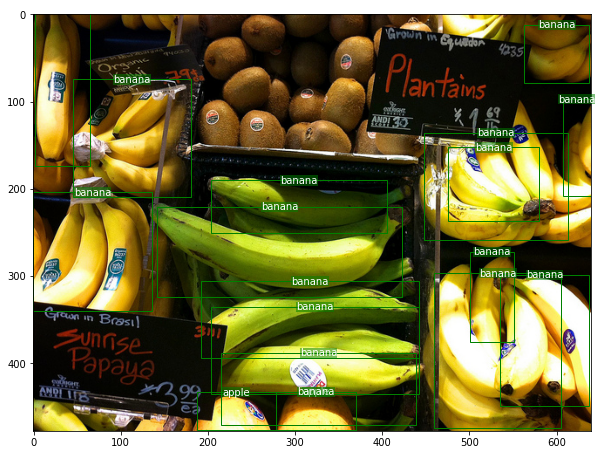

In [6]:
import json
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# launch predictor and run inference on an arbitrary image in the validation dataset
yolo_pred_cpu = tf.contrib.predictor.from_saved_model('./yolo_v3_coco_saved_model')
image_path = './val2017/000000581781.jpg'
with open(image_path, 'rb') as f:
    feeds = {'image': [f.read()]}
results = yolo_pred_cpu(feeds)

# load annotations to decode classification result
with open('./annotations/instances_val2017.json') as f:
    annotate_json = json.load(f)
label_info = {idx+1: cat['name'] for idx, cat in enumerate(annotate_json['categories'])}

# draw picture and bounding boxes
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(Image.open(image_path).convert('RGB'))
wanted = results['scores'][0] > 0.1
for xyxy, label_no_bg in zip(results['boxes'][0][wanted], results['classes'][0][wanted]):
    xywh = xyxy[0], xyxy[1], xyxy[2] - xyxy[0], xyxy[3] - xyxy[1]
    rect = patches.Rectangle((xywh[0], xywh[1]), xywh[2], xywh[3], linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    rx = rx + rect.get_width() / 2.0
    ax.annotate(label_info[label_no_bg + 1], (rx, ry), color='w', backgroundcolor='g', fontsize=10,
                ha='center', va='center', bbox=dict(boxstyle='square,pad=0.01', fc='g', ec='none', alpha=0.5))
plt.show()

## Part 2:  Compile the Pretrained SavedModel for Neuron

We make use of the Python compilation API `tfn.saved_model.compile` that is available in `tensorflow-neuron<2`. For the purpose of reducing Neuron runtime overhead, it is necessary to make use of arguments `no_fuse_ops` and `minimum_segment_size`.
Compiled model is saved in ./yolo_v3_coco_saved_model_neuron.

In [7]:
import shutil
import tensorflow as tf
import tensorflow.neuron as tfn


def no_fuse_condition(op):
    return op.name.startswith('Preprocessor') or op.name.startswith('Postprocessor')

with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, ['serve'], './yolo_v3_coco_saved_model')
    no_fuse_ops = [op.name for op in sess.graph.get_operations() if no_fuse_condition(op)]
shutil.rmtree('./yolo_v3_coco_saved_model_neuron', ignore_errors=True)
result = tfn.saved_model.compile(
    './yolo_v3_coco_saved_model', './yolo_v3_coco_saved_model_neuron',
    # to enforce trivial compilable subgraphs to run on CPU
    no_fuse_ops=no_fuse_ops,
    minimum_segment_size=100,
    batch_size=2,
    dynamic_batch_size=True,
)
print(result)

INFO:tensorflow:Restoring parameters from ./yolo_v3_coco_saved_model/variables/variables
INFO:tensorflow:Restoring parameters from ./yolo_v3_coco_saved_model/variables/variables
INFO:tensorflow:Froze 366 variables.
INFO:tensorflow:Converted 366 variables to const ops.
INFO:tensorflow:fusing subgraph {subgraph neuron_op_40079fd99a167dfc with input tensors ["<tf.Tensor 'Preprocessor/map/TensorArrayStack/TensorArrayGatherV30/_0:0' shape=(2, 416, 416, 3) dtype=float16>"], output tensors ["<tf.Tensor 'conv_lbbox/BiasAdd:0' shape=(2, 13, 13, 255) dtype=float16>", "<tf.Tensor 'conv_mbbox/BiasAdd:0' shape=(2, 26, 26, 255) dtype=float16>", "<tf.Tensor 'conv_sbbox/BiasAdd:0' shape=(2, 52, 52, 255) dtype=float16>"]} with neuron-cc
INFO:tensorflow:Number of operations in TensorFlow session: 4962
INFO:tensorflow:Number of operations after tf.neuron optimizations: 3010
INFO:tensorflow:Number of operations placed on Neuron runtime: 1891
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to 

## Deploy the model on Inferentia
## Part 3:Evaluate Model Quality after Compilation

### Define evaluation functions
We first define some handy helper functions for running evaluation on the COCO 2017 dataset.

In [8]:
import os
import json
import time
import numpy as np
import tensorflow as tf
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


def cocoapi_eval(jsonfile,
                 style,
                 coco_gt=None,
                 anno_file=None,
                 max_dets=(100, 300, 1000)):
    """
    Args:
        jsonfile: Evaluation json file, eg: bbox.json, mask.json.
        style: COCOeval style, can be `bbox` , `segm` and `proposal`.
        coco_gt: Whether to load COCOAPI through anno_file,
                 eg: coco_gt = COCO(anno_file)
        anno_file: COCO annotations file.
        max_dets: COCO evaluation maxDets.
    """
    assert coco_gt is not None or anno_file is not None

    if coco_gt is None:
        coco_gt = COCO(anno_file)
    print("Start evaluate...")
    coco_dt = coco_gt.loadRes(jsonfile)
    if style == 'proposal':
        coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
        coco_eval.params.useCats = 0
        coco_eval.params.maxDets = list(max_dets)
    else:
        coco_eval = COCOeval(coco_gt, coco_dt, style)
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()
    return coco_eval.stats


def bbox_eval(anno_file, bbox_list):
    coco_gt = COCO(anno_file)

    outfile = 'bbox_detections.json'
    print('Generating json file...')
    with open(outfile, 'w') as f:
        json.dump(bbox_list, f)

    map_stats = cocoapi_eval(outfile, 'bbox', coco_gt=coco_gt)
    return map_stats


def get_image_as_bytes(images, eval_pre_path):
    batch_im_id_list = []
    batch_im_name_list = []
    batch_img_bytes_list = []
    n = len(images)
    batch_im_id = []
    batch_im_name = []
    batch_img_bytes = []
    for i, im in enumerate(images):
        im_id = im['id']
        file_name = im['file_name']
        if i % eval_batch_size == 0 and i != 0:
            batch_im_id_list.append(batch_im_id)
            batch_im_name_list.append(batch_im_name)
            batch_img_bytes_list.append(batch_img_bytes)
            batch_im_id = []
            batch_im_name = []
            batch_img_bytes = []
        batch_im_id.append(im_id)
        batch_im_name.append(file_name)

        with open(os.path.join(eval_pre_path, file_name), 'rb') as f:
            batch_img_bytes.append(f.read())
    return batch_im_id_list, batch_im_name_list, batch_img_bytes_list


def analyze_bbox(results, batch_im_id, _clsid2catid):
    bbox_list = []
    k = 0
    for boxes, scores, classes in zip(results['boxes'], results['scores'], results['classes']):
        if boxes is not None:
            im_id = batch_im_id[k]
            n = len(boxes)
            for p in range(n):
                clsid = classes[p]
                score = scores[p]
                xmin, ymin, xmax, ymax = boxes[p]
                catid = (_clsid2catid[int(clsid)])
                w = xmax - xmin + 1
                h = ymax - ymin + 1

                bbox = [xmin, ymin, w, h]
                # Round to the nearest 10th to avoid huge file sizes, as COCO suggests
                bbox = [round(float(x) * 10) / 10 for x in bbox]
                bbox_res = {
                    'image_id': im_id,
                    'category_id': catid,
                    'bbox': bbox,
                    'score': float(score),
                }
                bbox_list.append(bbox_res)
        k += 1
    return bbox_list

Here is the actual evaluation loop. To fully utilize all four cores on one Inferentia, the optimal setup is to run multi-threaded inference using a `ThreadPoolExecutor`. The following cell is a multi-threaded adaptation of the evaluation routine at https://github.com/miemie2013/Keras-YOLOv4/blob/910c4c6f7265f5828fceed0f784496a0b46516bf/tools/cocotools.py#L97.

In [9]:
from concurrent import futures

def evaluate(yolo_predictor, images, eval_pre_path, anno_file, eval_batch_size, _clsid2catid):
    batch_im_id_list, batch_im_name_list, batch_img_bytes_list = get_image_as_bytes(images, eval_pre_path)

    # warm up
    yolo_predictor({'image': np.array(batch_img_bytes_list[0], dtype=object)})

    with futures.ThreadPoolExecutor(4) as exe:
        fut_im_list = []
        fut_list = []
        start_time = time.time()
        for batch_im_id, batch_im_name, batch_img_bytes in zip(batch_im_id_list, batch_im_name_list, batch_img_bytes_list):
            if len(batch_img_bytes) != eval_batch_size:
                continue
            fut = exe.submit(yolo_predictor, {'image': np.array(batch_img_bytes, dtype=object)})
            fut_im_list.append((batch_im_id, batch_im_name))
            fut_list.append(fut)
        bbox_list = []
        count = 0
        for (batch_im_id, batch_im_name), fut in zip(fut_im_list, fut_list):
            results = fut.result()
            bbox_list.extend(analyze_bbox(results, batch_im_id, _clsid2catid))
            for _ in batch_im_id:
                count += 1
                if count % 100 == 0:
                    print('Test iter {}'.format(count))
        print('==================== Performance Measurement ====================')
        print('Finished inference on {} images in {} seconds'.format(len(images), time.time() - start_time))
        print('=================================================================')
    # start evaluation
    box_ap_stats = bbox_eval(anno_file, bbox_list)
    return box_ap_stats

### Evaluate mean average precision (mAP) score
Here is the code to calculate mAP scores of the YOLO v3 model. The expected mAP score is around 0.328 if we use the pretrained weights.

In [11]:
yolo_pred = tf.contrib.predictor.from_saved_model('./yolo_v3_coco_saved_model_neuron')

val_coco_root = './val2017'
val_annotate = './annotations/instances_val2017.json'
clsid2catid = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 13, 12: 14, 13: 15, 14: 16,
               15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 24, 23: 25, 24: 27, 25: 28, 26: 31,
               27: 32, 28: 33, 29: 34, 30: 35, 31: 36, 32: 37, 33: 38, 34: 39, 35: 40, 36: 41, 37: 42, 38: 43,
               39: 44, 40: 46, 41: 47, 42: 48, 43: 49, 44: 50, 45: 51, 46: 52, 47: 53, 48: 54, 49: 55, 50: 56,
               51: 57, 52: 58, 53: 59, 54: 60, 55: 61, 56: 62, 57: 63, 58: 64, 59: 65, 60: 67, 61: 70, 62: 72,
               63: 73, 64: 74, 65: 75, 66: 76, 67: 77, 68: 78, 69: 79, 70: 80, 71: 81, 72: 82, 73: 84, 74: 85,
               75: 86, 76: 87, 77: 88, 78: 89, 79: 90}
eval_batch_size = 8
with open(val_annotate, 'r', encoding='utf-8') as f2:
    for line in f2:
        line = line.strip()
        dataset = json.loads(line)
        images = dataset['images']
box_ap = evaluate(yolo_pred, images, val_coco_root, val_annotate, eval_batch_size, clsid2catid)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.
Test iter 100
Test iter 200
Test iter 300
Test iter 400
Test iter 500
Test iter 600
Test iter 700
Test iter 800
Test iter 900
Test iter 1000
Test iter 1100
Test iter 1200
Test iter 1300
Test iter 1400
Test iter 1500
Test iter 1600
Test iter 1700
Test iter 1800
Test iter 1900
Test iter 2000
Test iter 2100
Test iter 2200
Test iter 2300
Test iter 2400
Test iter 2500
Test iter 2600
Test iter 2700
Test iter 2800
Test iter 2900
Test iter 3000
Test iter 3100
Test iter 3200
Test iter 3300
Test iter 3400
Test iter 3500
Test iter 3600
Test iter 3700
Test iter 3800
Test iter 3900
Test iter 4000
Test iter 4100
Test iter 4200
Test iter 4300
Test iter 4400
Test iter 4500
Test iter 4600
Test iter 4700
Test iter 4800
Test iter 4900
==================== Performance Measurement ====================
Finished inference on 5000 ima